In [84]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle

In [2]:
#import the data 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#let us see the dataset of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

W (WIN) = WIN Indicates the number of win a team have in the season, this coulmn is our Label data and it is a continuous data so here we can interpret that we need to build a regression model for this data set which will predict the numbers of win of the particular team.

R (RUNS) = RUNS columns tells us the data about total runs of a particular team in entire season. As we know the baseball game is all about the scoring runs, and the team who has higher runs in 9 innings wins the match. A player is awarded a run if he crosses the plate to score his team a run. When tallying runs scored, the way in which a player reached base is not considered. If a player reaches base by an error or a fielder's choice, as long as he comes around to score, he is still credited with a run. If a player enters the game as a pinch-runner and scores, he is also credited with a run.

AB (AT-BATS) = In baseball games AT-BATS (AB) is a batter's turn betting against pitcher. An official At-Bat comes when a better reaches bases via (1) a fielder's choice. (2) by hit. (3) by an error (4) put-out on a non-sacrifice. Also At-Bat is different from Plate appearence.

H (HITS) = HIT in baseball occurs when a batter strikes the ball into the fair territory and reaches base without an error or fielder's choice. There are four types of hits in baseball Singles, Doubles, Triples and Home Run.

2B (DOUBLES) = DOUBLES are basically a batter get when he hits the ball into play area and reaches the second base without the help of an intervening error or an attempt to put out another baserunner.

3B (TRIPLES) = TRIPLES are basically a batter get when he hits the ball into play area and reaches the 3rd base without the help of an intervening error or attempt to put out another baserunner, this is a very rare in baseball as in attempts to reach 3rd base a batter covers almost 270 feet of running and most of the team is able to get the ball infield till the time a batter reaches the second base a triples are oftenly scored by a very fast runner batter and most of the time when batter hits the ball deeper into right field as it is hard to through the ball from right field to 3rd base.

HR (HOMERUNS) = HOMERUNS occurs when a batter hits a fair ball and scores without being put out or without an error. In almost every instances of a home run, a batter hits the ball in the air over the outfield fence in fair territory and the batter is awarded all four bases and any runner on base scores as well.

BB (WALK or BASE ON BALLS) = WALK occurs when pitcher throws four pitches out of the strike zone and hitter does not swing his bat in all 4 pitches in that case the hitter is awarded by the 1st base. He simply walks to the 1st base and another batter comes to the home plate for batting that's it is called a walk. Also note that when a picther throws the ball out of the strike zone and batter does not swing his bat it is considered as 1 ball and in for balls batter is awarded by a base that is why it's name is *BASE ON BALLS*.

SO (STRIKEOUTS) = STRIKE OUT is basically a batter is out after 3 strikes that means when a pitcher throws 3 balls into the strike zone( a square size box whose hight is batter's knee to belt and width is the size of plate) strike could happen in other ways as well like if batter hits the ball into the foul zone then it's a strike if batter has 0 and 1 strike but if batter has 2 strikes already then hitting ball into foul zone won't count as strike.

SB (STOLEN BASE) = STOLEN BASE is a base score steel by the base runner, this happens when the base runner takes a base run which he is not entitled for while pitcher is taking a pickoff for throwing the ball or catcher is throwing ball back to picther or the ball is still in the hand of pitcher so in this case the ball is not hit by batter but the base runner some took a base run this is known as *STOLEN BASE*.

RA (RUNS ALLOWED) = RUNS ALLOWED is every run scored(earned runs & unearned runs) against the defensive team regardless of how the runs has been scored is known as *RUNS ALLOWED*.

ER (EARNED RUNS) = EARNED RUNS are the runs which is scores against the pitcher without the benefit of an error or a passed balls is known as *EARNED RUNS*.

ERA (EARNED RUNS AVERAGE) = EARNED RUNS AVERAGE represents the number of earned runs a pitcher allowed per innings. This is a statistical tools for eavaluating the ptcher's performance.

CG (COMPLETE GAMES) = COMPLETE GAMES is a term which is earned by the picthers if they are the only pitcher who pitched in the entire innings of the game regardless of how long the game lasts. Complete games considered valuable in baseball because if a pitcher pitched the ball in entire game that means he really pitched well that is why he is allowed to pitch in entire game.

SHO (SHUTOUT) = SHUTOUT is again a term for picthers, the pitcher who pitched for his team in entire game and does not allow the opposition team to score is awarded as the *SHUTOUT*

SV (SAVE) = SAVE is awarded to the relief pitchers who finishes the game for winning team under certain circumstances (1) enters the game with leads no more than 3 runs and pitch at least one inning. (2) enters the game with tying run in the on-deck circle, at the plates or on the bases. (3) Pitch at least 3 innings. A pitcher can not receive a save and win in the same game.

E (ERROR) = ERRORS are given to the fielders if in the judgement of the official scorer fielder fails to convert an out on a play that an average player should have made. Fielders can also be given errors if the makes a poor play that allows one or more runners to advance on the bases. A batter does not necessarily need to reach base for a fielder to be given an error. If he drops a foul ball that extends an at-bat, that fielder can also be assessed an error.

In [5]:
# checking the shape of data
df.shape

(30, 17)

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
#see if there are any missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

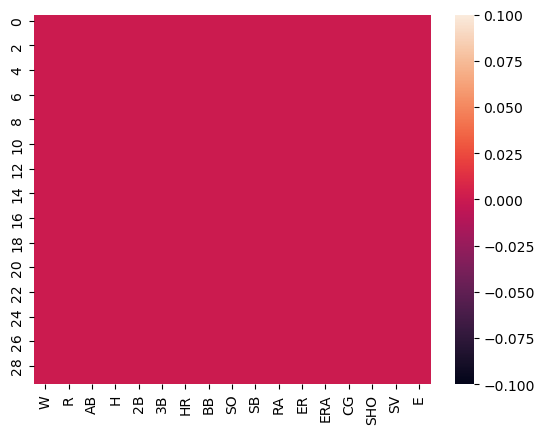

In [8]:
sns.heatmap(df.isnull())

In [9]:
#lets see how many unique values are there in each column
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

Observation: Most values are non-repeating and unique, meaning they are all numerical and not categorical.

In [10]:
#lets see the co relation between the columns
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<Axes: >

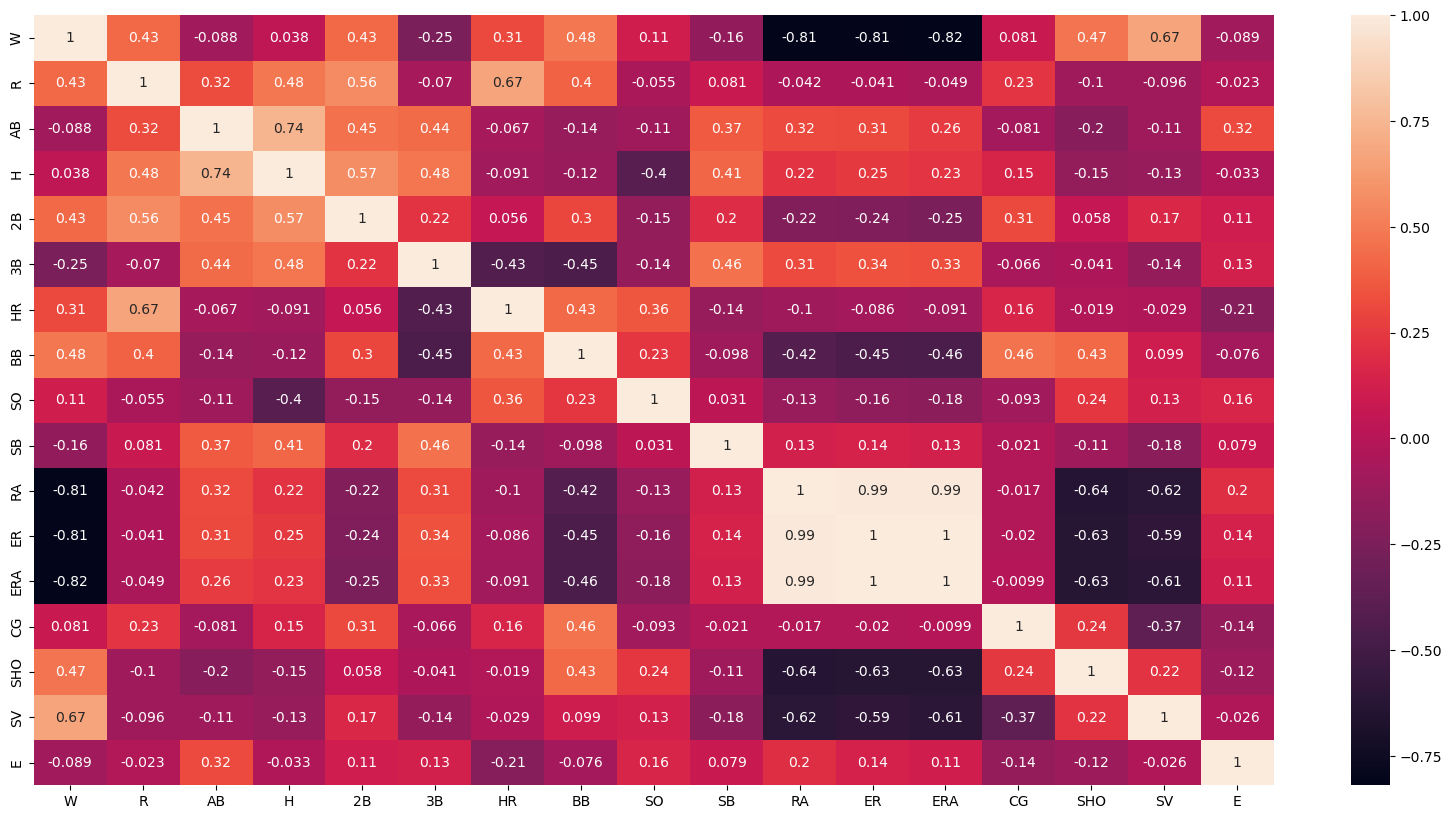

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

There is extremely high correlation between RA, ERA and ER. There is high negative correlation of RA, ER and ERA with Wins. RA, ER and ERA also have high negative correlation with SHO and SV.

In [12]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

there is skewness in R

array([[<Axes: title={'center': 'W'}>, <Axes: title={'center': 'R'}>,
        <Axes: title={'center': 'AB'}>],
       [<Axes: title={'center': 'H'}>, <Axes: title={'center': '2B'}>,
        <Axes: title={'center': '3B'}>],
       [<Axes: title={'center': 'HR'}>, <Axes: title={'center': 'BB'}>,
        <Axes: title={'center': 'SO'}>],
       [<Axes: title={'center': 'SB'}>, <Axes: title={'center': 'RA'}>,
        <Axes: title={'center': 'ER'}>],
       [<Axes: title={'center': 'ERA'}>, <Axes: title={'center': 'CG'}>,
        <Axes: title={'center': 'SHO'}>],
       [<Axes: title={'center': 'SV'}>, <Axes: title={'center': 'E'}>,
        <Axes: >]], dtype=object)

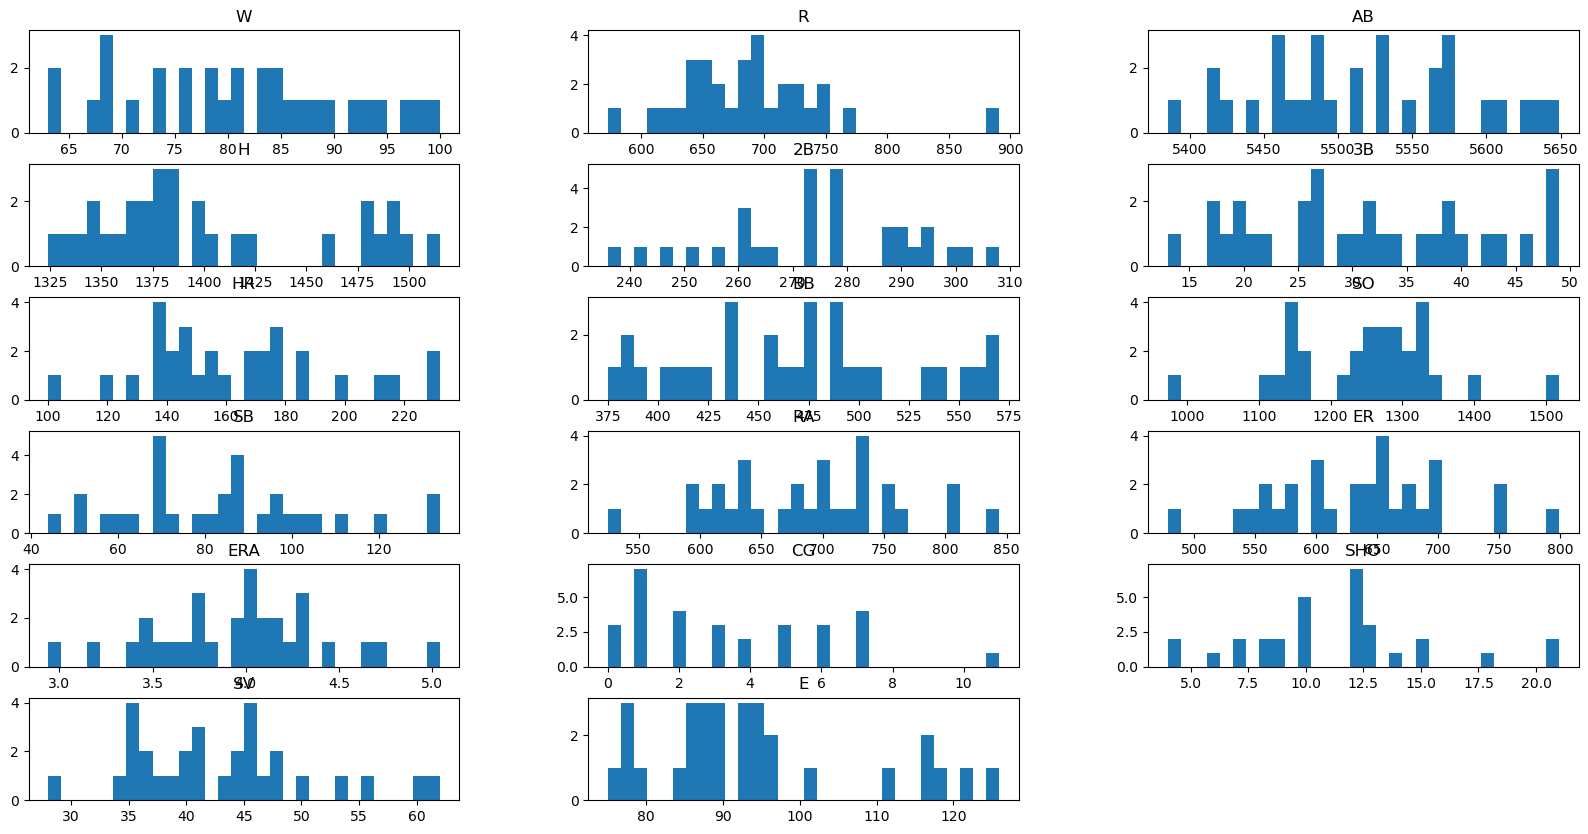

In [13]:
df.hist(figsize=(20,10), grid=False, layout=(6, 3), bins = 30)

There is very minimal skewness in R, and no skewness in other plot.

Text(0.5, 1.0, 'Runs')

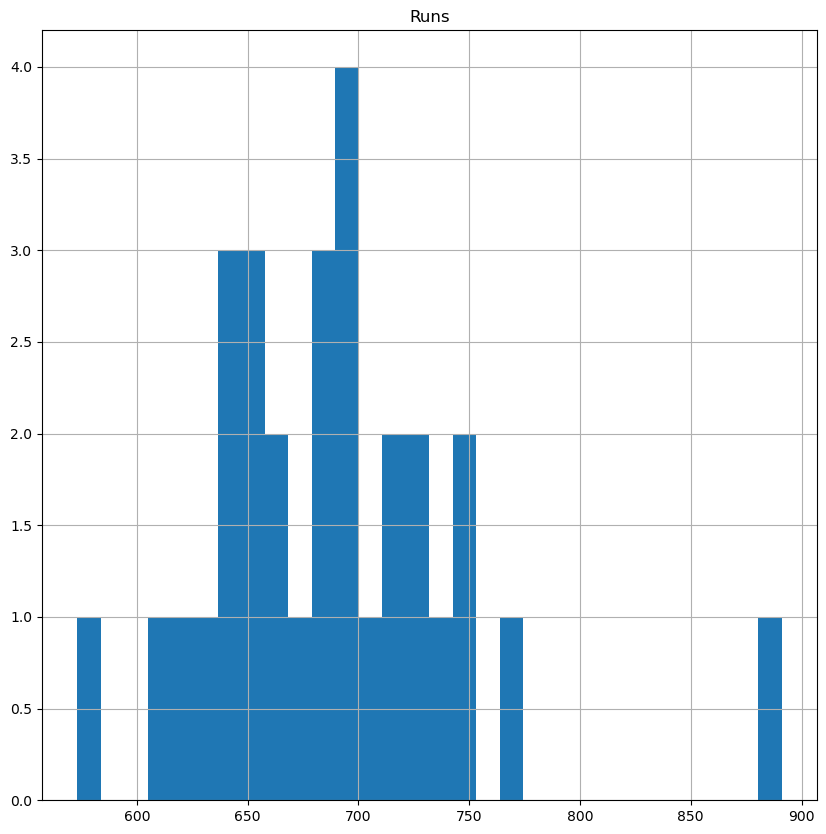

In [14]:
df['R'].hist(figsize=(10,10), bins=30)
plt.title('Runs')

There is an overall normal distribution with slight right skewness caused by the outlier data on the right.

Text(0.5, 1.0, 'Number of Wins')

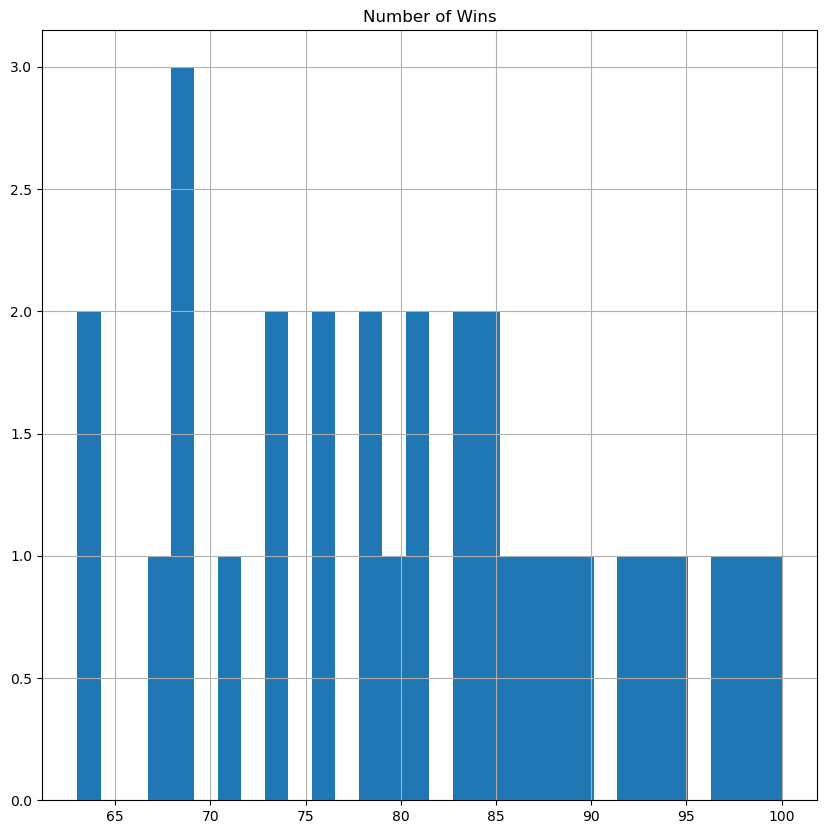

In [15]:
df['W'].hist(figsize=(10,10), bins=30)
plt.title('Number of Wins')

The target variable W is normally distributed

Text(0.5, 1.0, 'Errors')

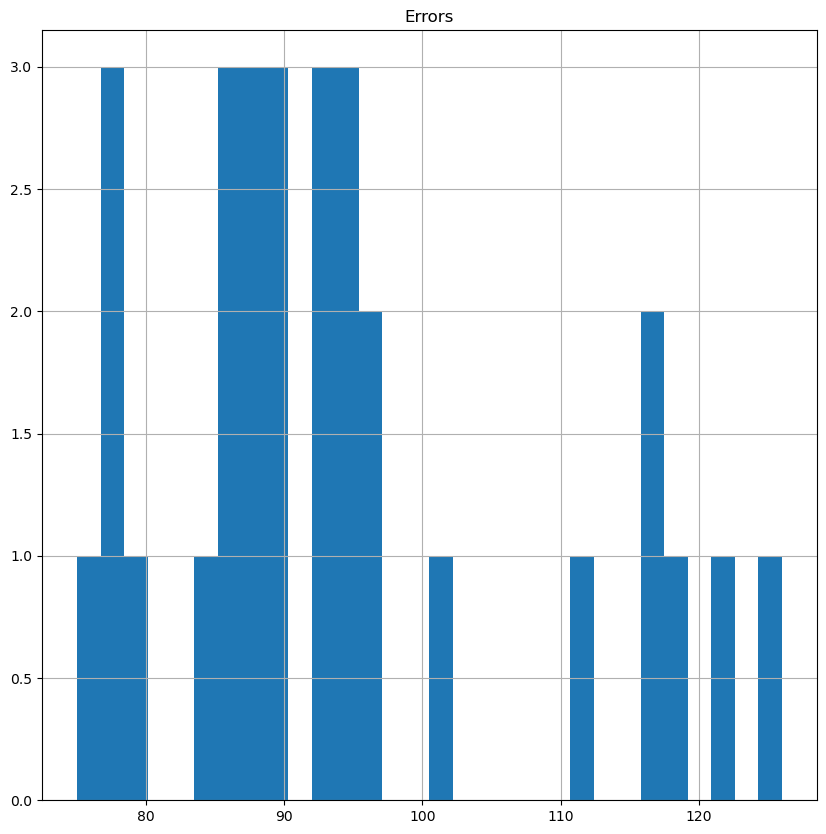

In [16]:
df['E'].hist(figsize=(10,10), bins=30)
plt.title('Errors')

This plot has 2nd highest skewness value of 0.89, but due to it being less than 1, the distribution is still normal.

Text(0.5, 1.0, 'Complete Games')

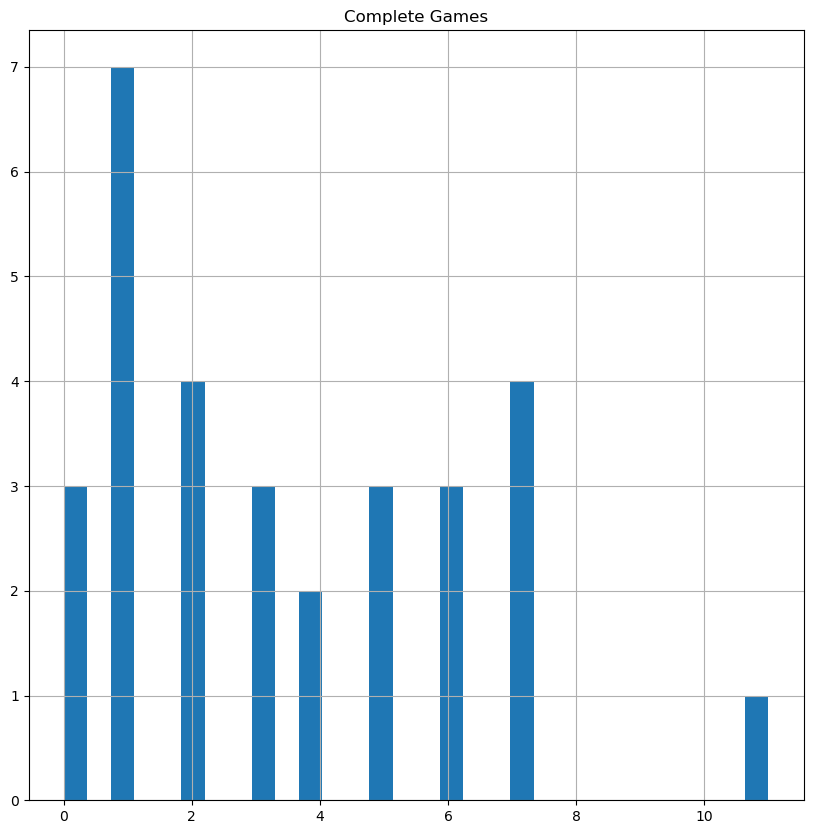

In [17]:
df['CG'].hist(figsize=(10,10), bins=30)
plt.title('Complete Games')

This plot has 3rd highest skewness value of 0.73, but due to it being less than 1, the distribution is still relatively normal.

<Axes: >

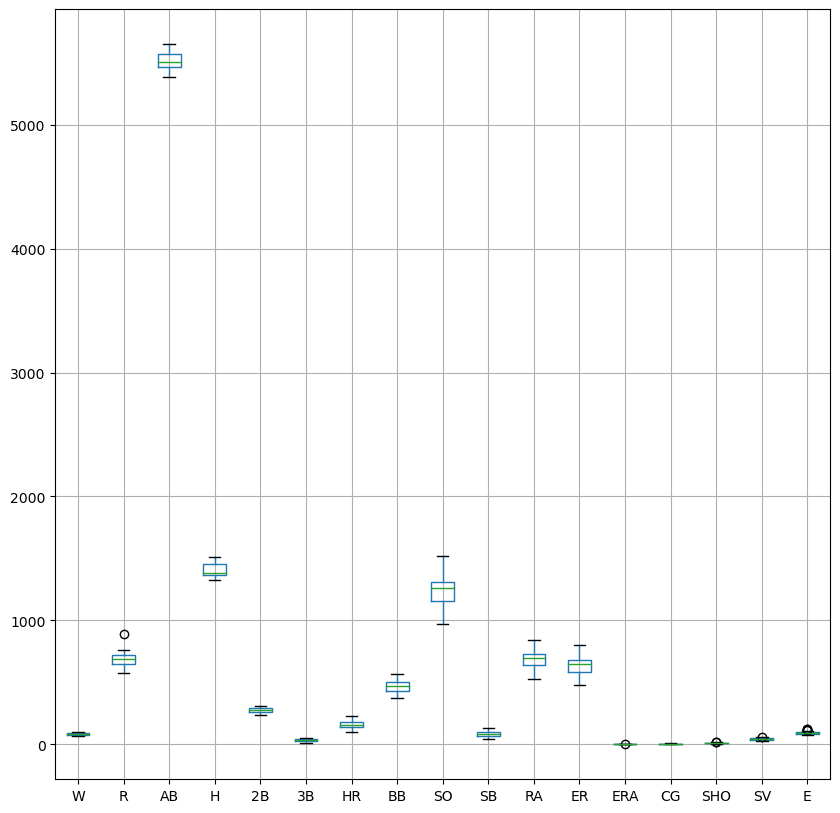

In [18]:
df.boxplot(figsize=(10,10))


Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Observation: Outliers are present in R (Runs), ERA (Earned Run Average), SHO (Shutouts), SV (Saves), E (Errors).

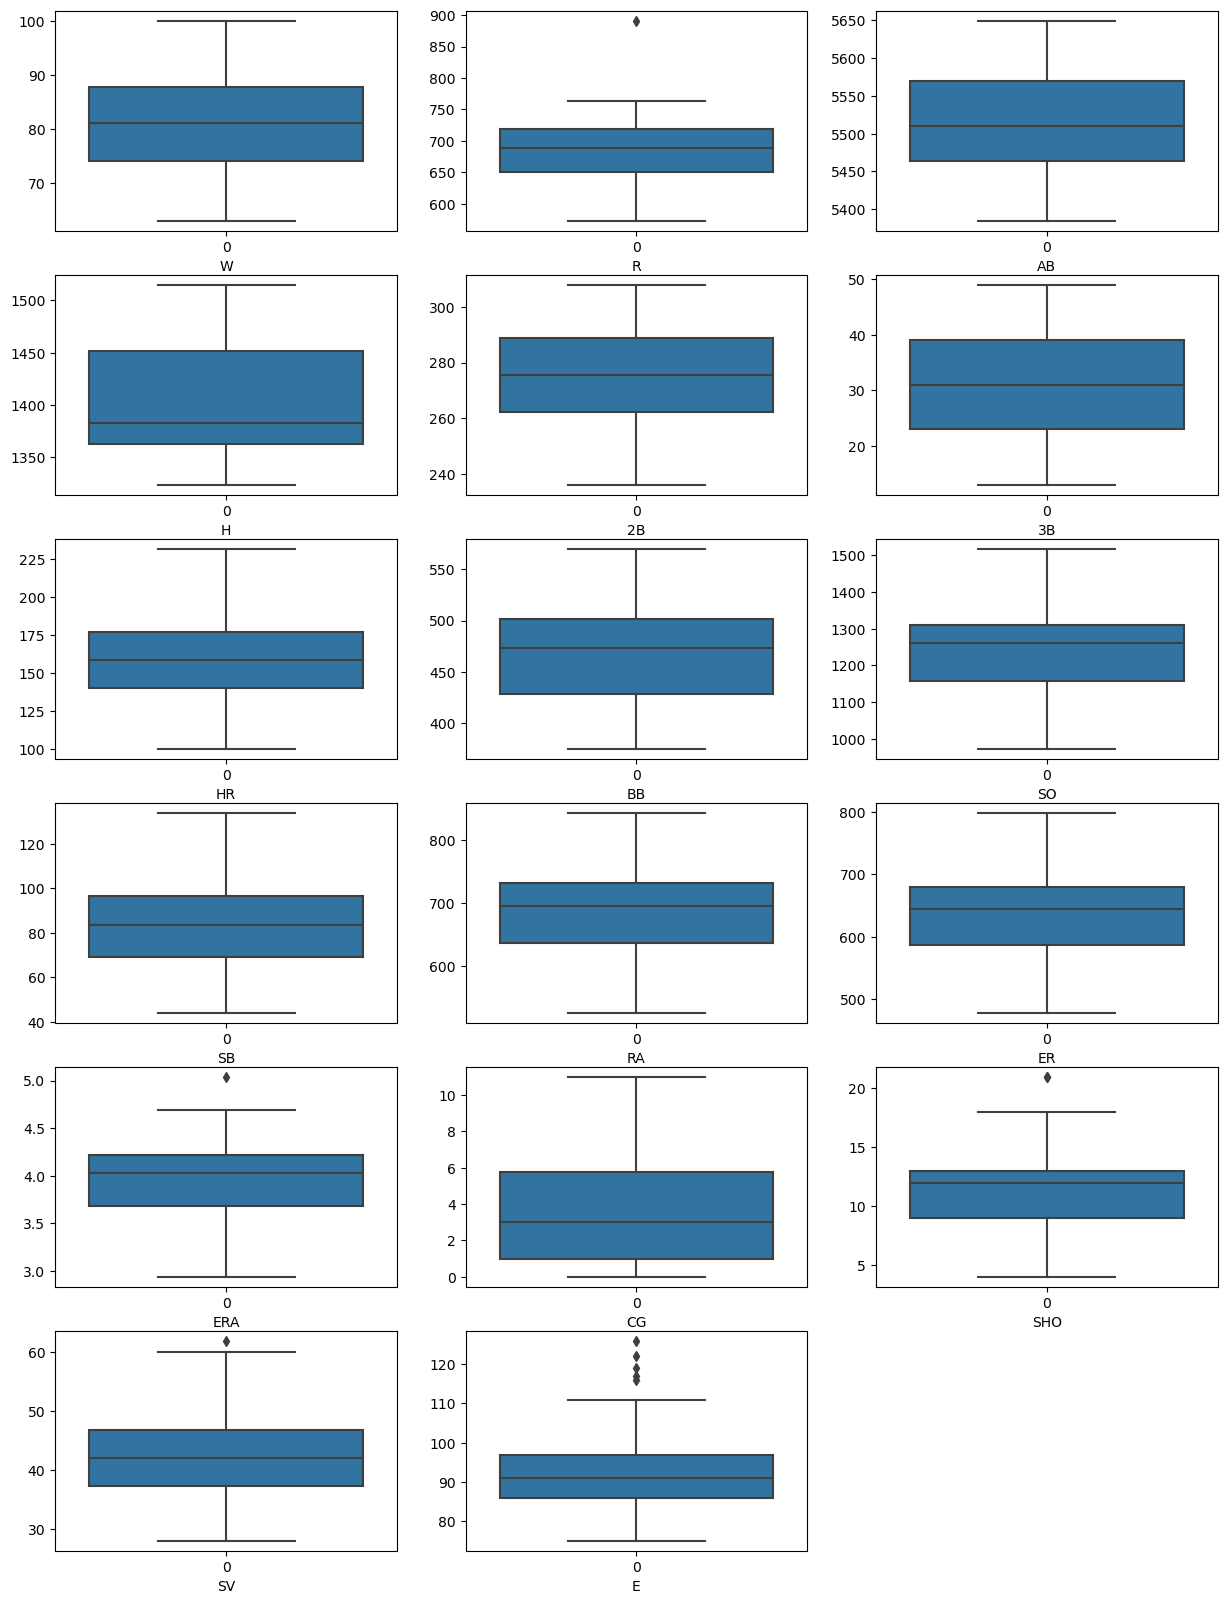

In [19]:
plt.figure(figsize=(15,20))
plotnumber=1

for columns in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[columns])
        plt.xlabel(columns, fontsize=10)
    plotnumber+=1
plt.show()

In R and ERA column there is only one outlier. 
1+ outliers present in SHO column. 
Around 5 outliers present in E (Errors) column

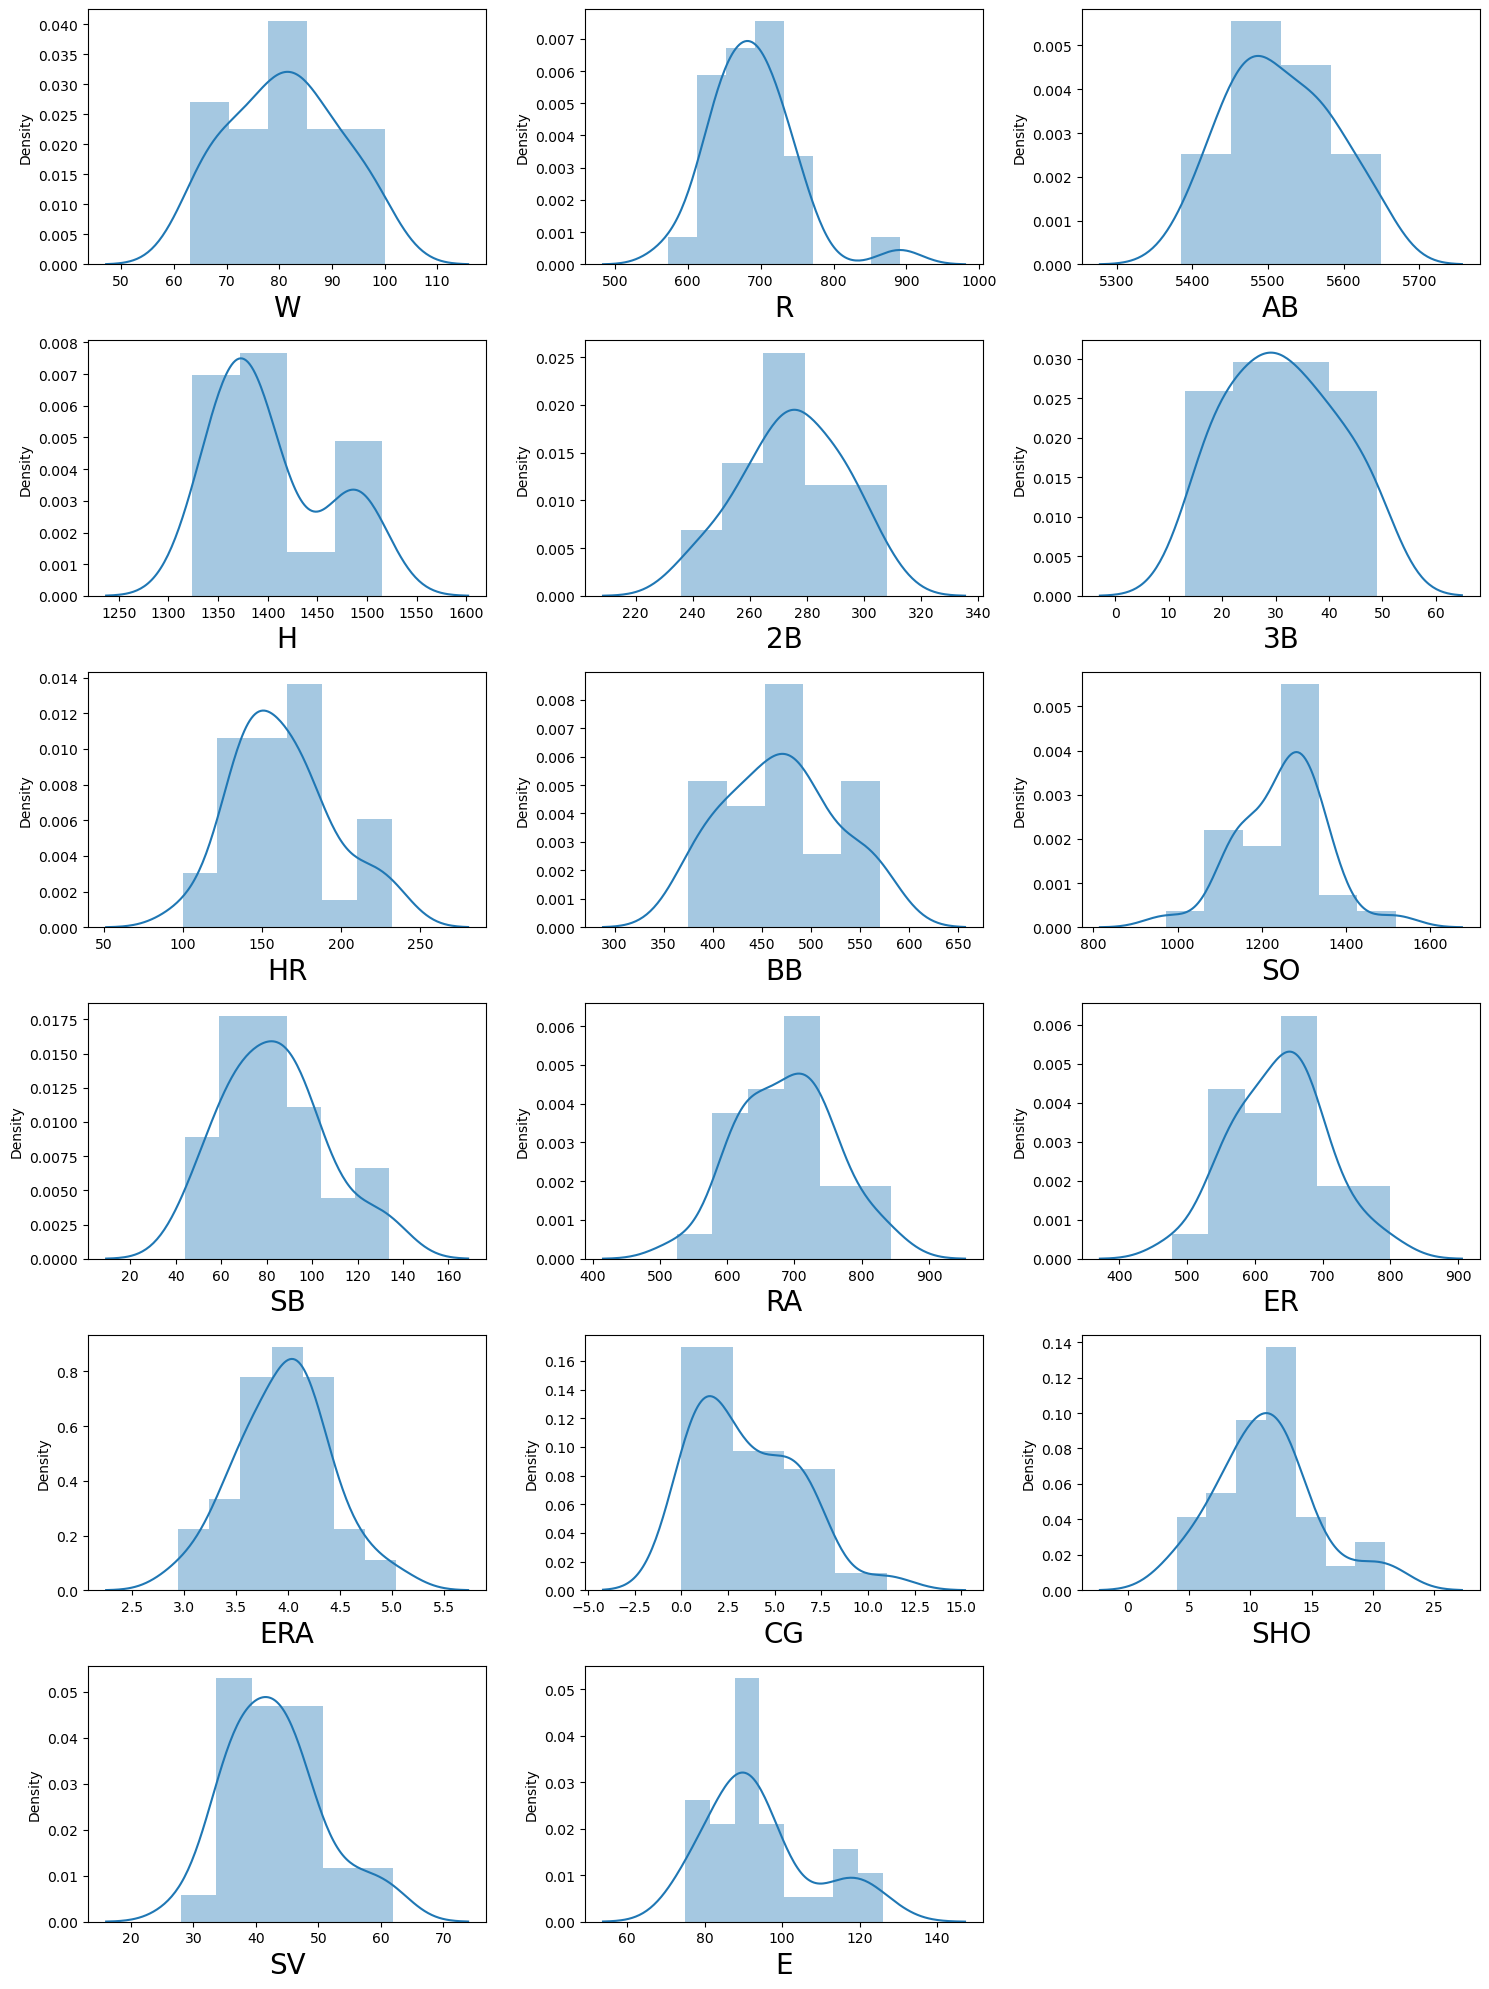

In [20]:
# plotting a distribution plot of all the columns of dataset with for loop
plt.figure(figsize = (15,20))
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above Distribution plot we can see that almost all the column's data are normally distributed. 

Bivariate analysis

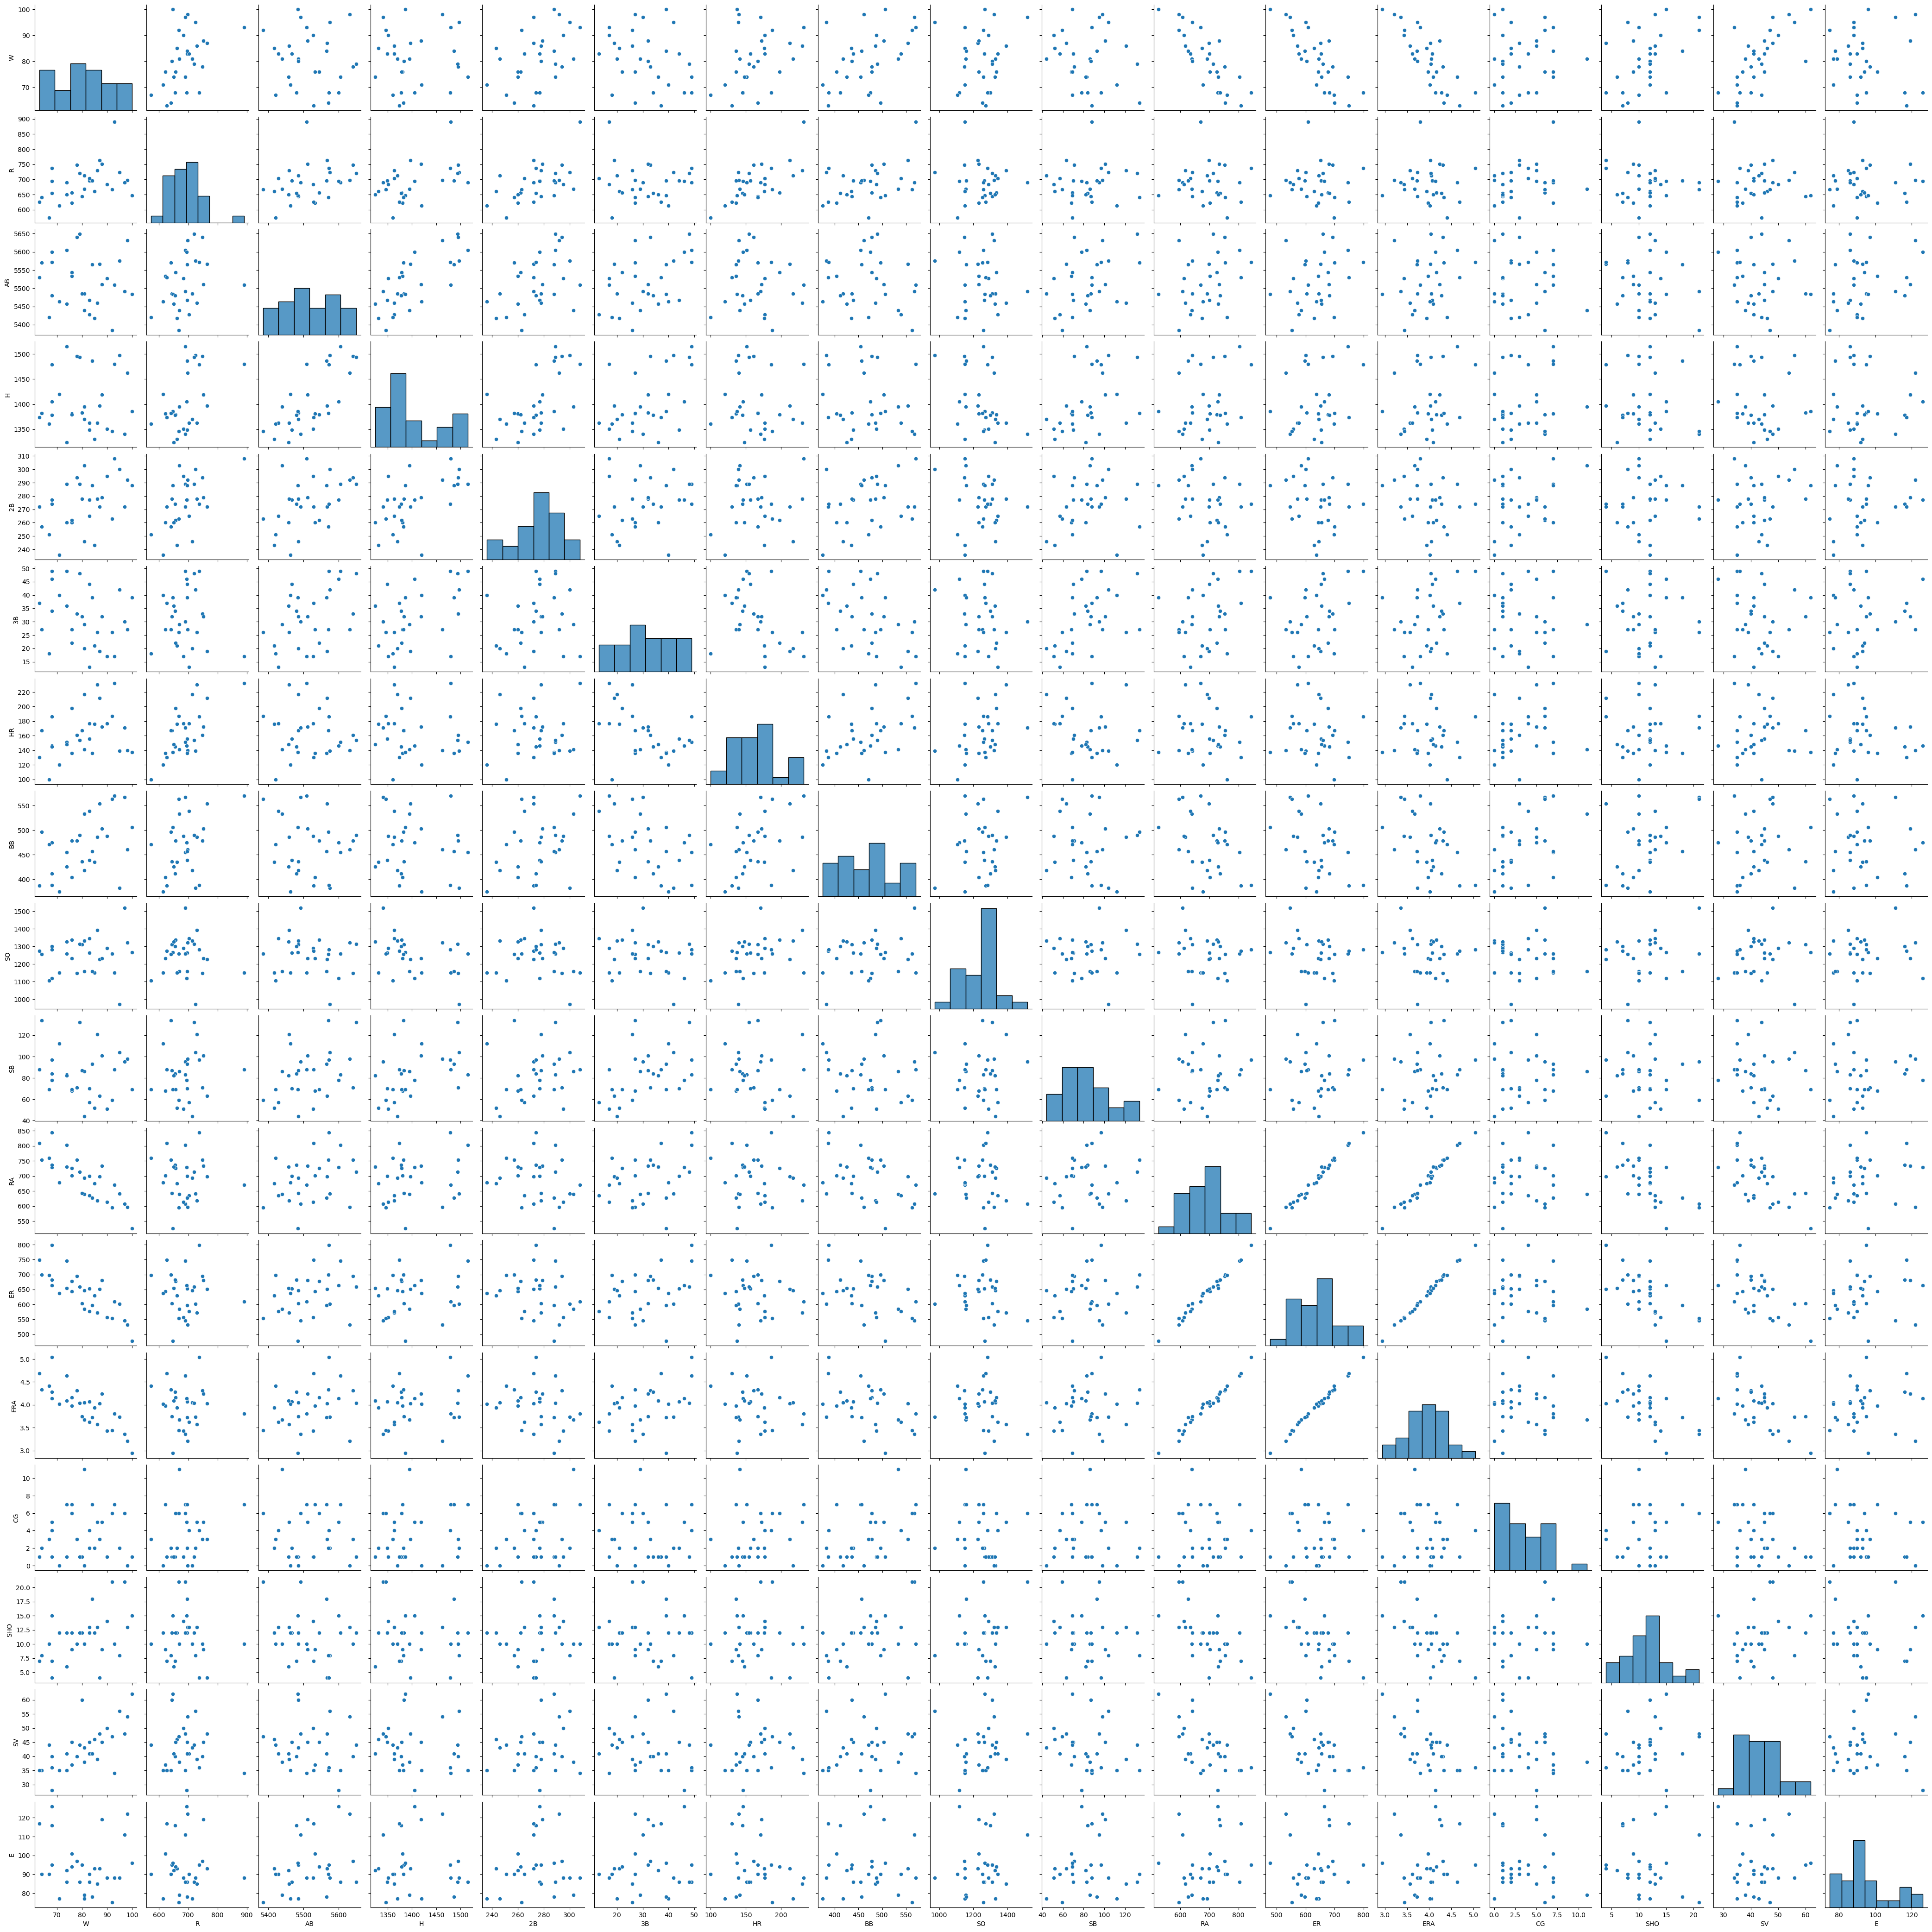

In [21]:
sns.pairplot(df)

 We can clearly spot RA, ER and ERA as they are highest correlated data. All other data are correlated less

Splitting data for training and testing

In [22]:
# let's saperate the features and label
x = df.drop(columns = 'W')
y = df['W']

now lets remove skewness with Power Transformers

In [23]:
from sklearn.preprocessing import power_transform

In [24]:
x_new = power_transform(x, method='yeo-johnson')   # yeo johnson method because 0 is present in CG column
x_new = pd.DataFrame(x_new, columns=x.columns)

In [25]:
x = x_new

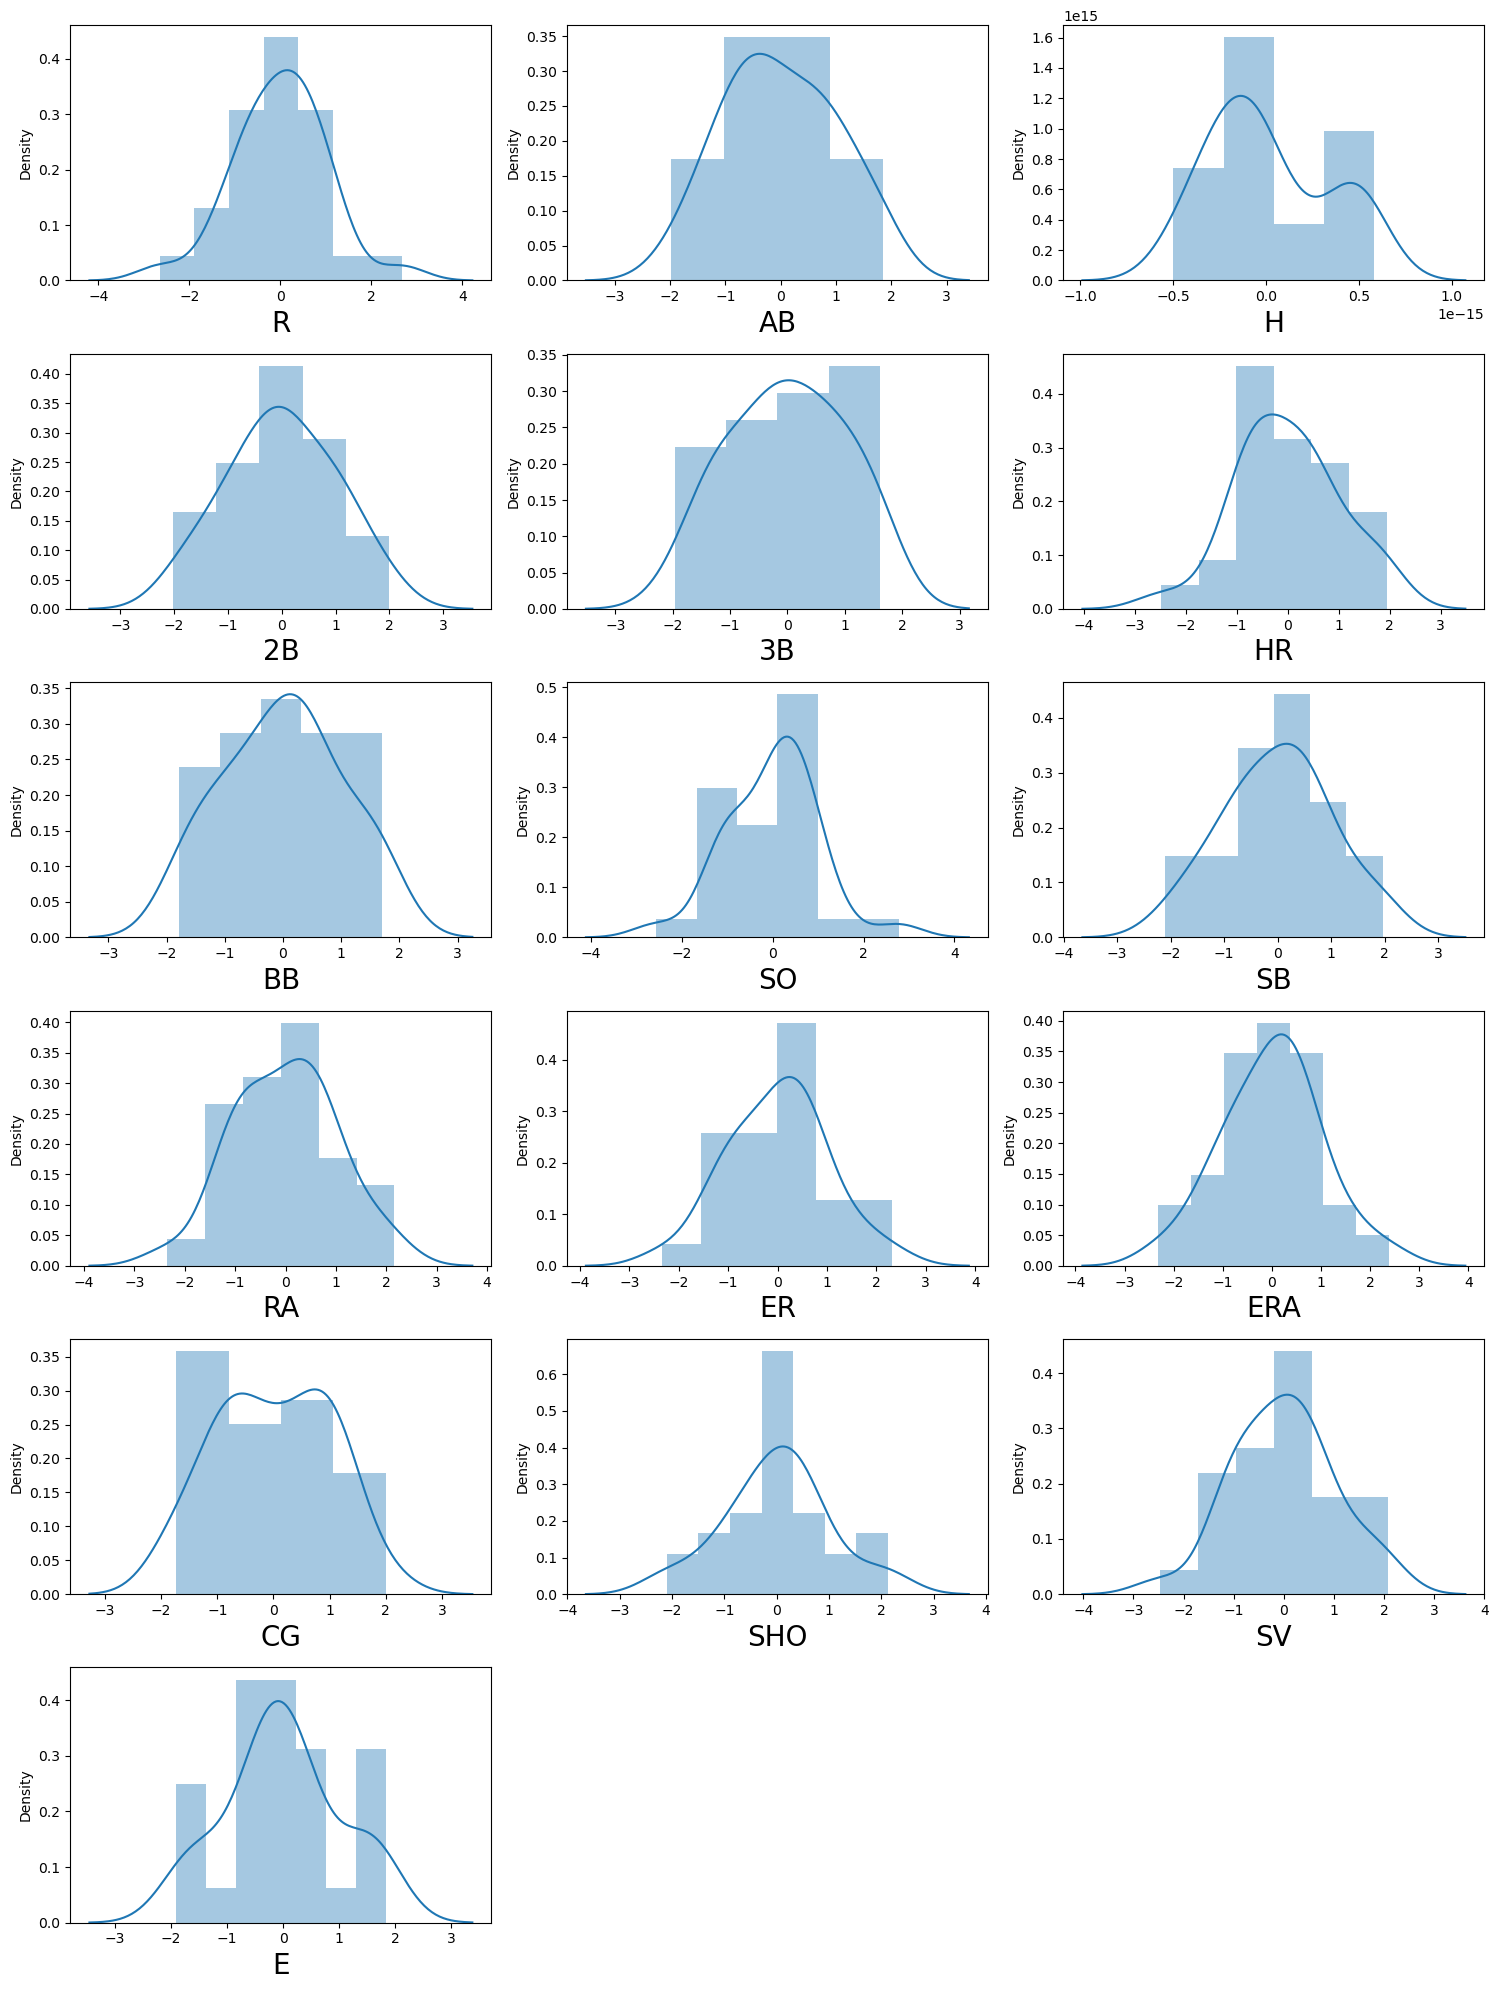

In [26]:
# plotting a distribution plot of all the columns of dataset with for loop
plt.figure(figsize = (15,20))
plotnumber = 1

for column in x:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

it looks very clear now that data of all the columns are now normally distributed. now we will check for the correlation with features to feature and label with the help of corr() method to check the relationship between features to features and at the same time relation between features to label

In [27]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Standard Scaler

We will standardise our feature data for using Standard Scaler after that we will divide our dataset into train data and test data.

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.72821774,  0.85925175,  1.53885176,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.26121202, -0.70092715, -1.00156765,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [-0.24482102, -1.12557261, -0.03796029,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [-1.28512888,  0.26789362, -0.3007623 , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.13562216,  1.26816961,  1

Finding best Random State

In [29]:
max_accu = 0
best_rs = 0

for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accu:
        max_accu = accuracy
        best_rs = i
print('Best accuracy is ',max_accu, 'at random state ', best_rs)

Best accuracy is  0.9504759475713973 at random state  511


We got the best random state for linear regression, now we will build the linear regression model with the best random state what we got.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 511)

Models

In [31]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [32]:
models = [lr, ridge, lasso, en, knn, svr, dtr, rf]

In [33]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    score=i.score(x_train,y_train)
    print(f'{i} had score of {round((score*100),2)}% and r2_score is {r2_score(y_test,pred)}')
    print('')

LinearRegression() had score of 94.15% and r2_score is 0.9504759475713973

Ridge() had score of 92.82% and r2_score is 0.8942799967549575

Lasso() had score of 88.4% and r2_score is 0.8861606276281608

ElasticNet() had score of 85.37% and r2_score is 0.8346858713163912

KNeighborsRegressor() had score of 75.77% and r2_score is 0.6099999999999999

SVR() had score of 25.0% and r2_score is 0.12052545148992166

DecisionTreeRegressor() had score of 100.0% and r2_score is 0.5134529147982063

RandomForestRegressor() had score of 92.18% and r2_score is 0.695089013452915



All the 8 models have given the accuracy score very differently, out of which the DecisionTreeRegressor has given the highest accuracy that is 100% and SVR has given the lowest score that is 25%.

Now we have to choose the best model out of it but before that we will cross validate our models and than we will analyze the score after cross validation and based on cross validation we will decide our best model.

Cross Validation

In [34]:
# cross validation for Linear Regression
cvs1 = cross_val_score(lr,x_scaled,y,cv = 5)
print("Cross Validation Score for Linear Regression is ", cvs1.mean())

Cross Validation Score for Linear Regression is  -0.32377002796119214


In [35]:
# cross validation for Ridge Regression
cvs2 = cross_val_score(ridge,x_scaled,y,cv = 5)
print("Cross Validation Score for Ridge Regression is ", cvs2.mean())

Cross Validation Score for Ridge Regression is  0.42221319107099553


In [36]:
# cross validation for Lasso Regression
cvs3 = cross_val_score(lasso,x_scaled,y,cv = 5)
print("Cross Validation Score for Lasso Regression is ", cvs3.mean())

Cross Validation Score for Lasso Regression is  0.574210135599541


In [37]:
# cross validation for Elastic Net
cvs4 = cross_val_score(en,x_scaled,y,cv = 5)
print("Cross Validation Score for Elastic Net is ", cvs4.mean())

Cross Validation Score for Elastic Net is  0.41733738543737153


In [38]:
# cross validation for KNeighborsRegressor
cvs5 = cross_val_score(knn,x_scaled,y,cv = 5)
print("Cross Validation Score for KNeighborsRegressor is ", cvs5.mean())

Cross Validation Score for KNeighborsRegressor is  -0.14594559902930013


In [39]:
# cross validation for SVR
cvs6 = cross_val_score(svr,x_scaled,y,cv = 5)
print("Cross Validation Score for SVR is ", cvs6.mean())

Cross Validation Score for SVR is  -0.381924959744125


In [40]:
# cross validation for DecisionTreeRegressor
cvs7 = cross_val_score(dtr,x_scaled,y,cv = 5)
print("Cross Validation Score for DecisionTreeRegressor is ", cvs7.mean())

Cross Validation Score for DecisionTreeRegressor is  -1.9563066318701892


In [41]:
# cross validation for RandomForestRegressor
cvs8 = cross_val_score(rf,x_scaled,y,cv = 5)
print("Cross Validation Score for RandomForestRegressor is ", cvs8.mean())

Cross Validation Score for RandomForestRegressor is  -0.7015070922886596


So according to this theory our best fit model is Lasso Regression. Now we will tune the parameters of LassoRegression to see if we can further increase the model score or not.

Hyper parameter Tuning

In [75]:
parameters ={'alpha':np.arange(0.001,1.0,0.01),
            'selection' : ['cyclic', 'random'],
            'max_iter' : [500,750,1000,1250,1500,1750,2000]}

In [76]:
grid = GridSearchCV(estimator=lasso, param_grid=parameters)

In [77]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141, 0.151, 0.161, 0.171,
       0.181, 0.191, 0.201, 0.211, 0.221, 0.231, 0.241, 0.251, 0.261,
       0.271, 0.281, 0.291, 0.301, 0.311, 0.321, 0.331, 0.341, 0.351,
       0.361, 0.371, 0.381, 0.391, 0.401, 0.411, 0.421, 0.431, 0.441,
       0.451, 0.461, 0.471, 0.48...
       0.541, 0.551, 0.561, 0.571, 0.581, 0.591, 0.601, 0.611, 0.621,
       0.631, 0.641, 0.651, 0.661, 0.671, 0.681, 0.691, 0.701, 0.711,
       0.721, 0.731, 0.741, 0.751, 0.761, 0.771, 0.781, 0.791, 0.801,
       0.811, 0.821, 0.831, 0.841, 0.851, 0.861, 0.871, 0.881, 0.891,
       0.901, 0.911, 0.921, 0.931, 0.941, 0.951, 0.961, 0.971, 0.981,
       0.991]),
                         'max_iter': [500, 750, 1000, 1250, 1500, 1750, 2000],
                         'selection': ['cyclic', 'random']})

In [78]:
grid.best_params_

{'alpha': 0.9909999999999999, 'max_iter': 2000, 'selection': 'random'}

In [79]:
lasso = grid.best_estimator_

In [80]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.9909999999999999, max_iter=2000, selection='random')

In [82]:
pred1 = lasso.predict(x_test)

In [83]:
r2_score(y_test, pred1)

0.8860660402504609

model accuracy has been decreased after hyperparameter tuning so we will select the previous model what we built initially.

Model Saving

In [86]:
file_name = 'Baseball_win_prediction.pickle'
pickle.dump(lasso,open(file_name,'wb'))

In [87]:
#get the saved model
saved_model = pickle.load(open(file_name,'rb'))

In [88]:
# predicting with the loaded model
predictions = saved_model.predict(x_test)

In [90]:
# making dataframe
conclusion = pd.DataFrame({})
conclusion['Predictions'] = predictions
conclusion['Actual'] = pred
conclusion

,Predictions,Actual
0,78.985500,75.78
1,93.281441,91.94
2,82.346578,76.36
3,74.287835,71.83
4,67.624425,71.82
5,87.716348,84.35
6,68.915564,73.46
7,81.350448,78.06
